<a href="https://colab.research.google.com/github/paki66/artificialintelligence/blob/main/istrAI_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# istrAI experimental
members: Mihaela Soldat, Noel Modrusan and Paolo Bursic
This file contains all our steps including the mistakes we made during project creating.

In [ ]:
# wrong import of dataset
"""
from google.colab import files
uploaded = files.upload()
"""

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [ ]:
# wrong import of dataset
"""
import io
df2 = pd.read_csv(io.BytesIO(uploaded['spam.csv']))
"""

"\nimport io\ndf2 = pd.read_csv(io.BytesIO(uploaded['spam.csv']))\n"

In [2]:
# correct dataset import
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/paki66/artificialintelligence/main/spam.csv"
s=requests.get(url).text

df = pd.read_csv(StringIO(s))
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# dropping the unneccesary columns
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# counting number of ham and spam in dataset
numOfSpam = 0
numOfHam = 0

for i in range(len(df.index)):
  if df.at[i, "v1"] == "ham":
    numOfHam += 1
  else:
    numOfSpam += 1
numOfHam

4825

([<matplotlib.patches.Wedge at 0x7f12fde3f940>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

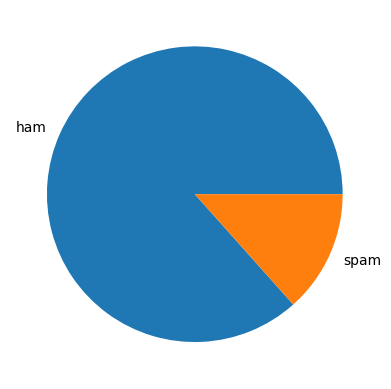

In [5]:
# showing difference of ham and spam number in a pie plot
import matplotlib.pyplot as plt
labels = "ham", "spam"
sizes = [numOfHam, numOfSpam]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

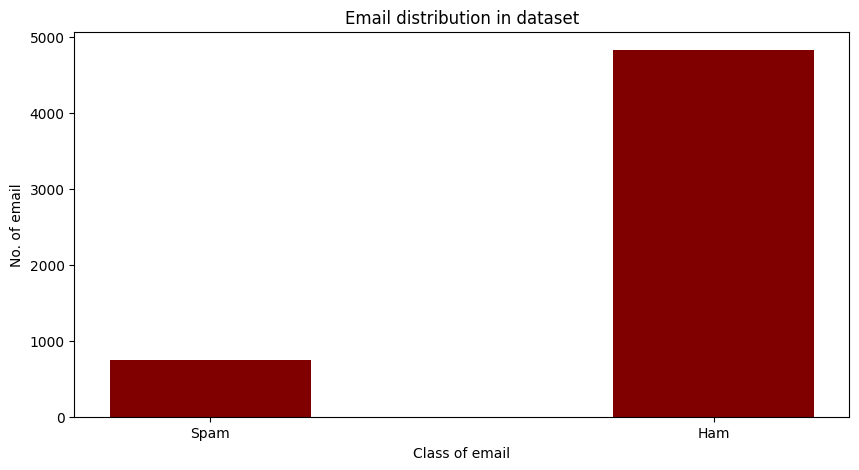

In [6]:
# showing difference between ham and spam in bar plot
import numpy as np

values = [numOfSpam, numOfHam]
classes = ["Spam", "Ham"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='maroon',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in dataset")
plt.show()

In [7]:
# division of dataset in train and test
from sklearn.model_selection import train_test_split

y=df['v1']
X=df["v2"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y)


In [8]:
type(X_train)

pandas.core.series.Series

In [9]:
# wrong syntax for iteration over dataset
"""
numOfSpamTrain = 0
numOfHamTrain = 0

for i in range(len(X_train.index)):
  if X_train.at[i, "v1"] == "ham":
    numOfHamTrain += 1
  else:
    numOfSpamTrain += 1
numOfHamTrain
"""

KeyError: ignored

In [10]:
# redundant info
"""
y_val = y_val.reset_index(drop = True)
y_train = y_train.reset_index(drop=True)
y_val
"""

0      spam
1       ham
2       ham
3       ham
4       ham
       ... 
553    spam
554     ham
555     ham
556    spam
557    spam
Name: v1, Length: 558, dtype: object

Reseting indices in test and train sets

In [ ]:
y_val = y_val.reset_index(drop = True)
y_val

0      spam
1       ham
2       ham
3       ham
4       ham
       ... 
553     ham
554     ham
555    spam
556     ham
557     ham
Name: v1, Length: 558, dtype: object

In [ ]:
X_val = X_val.reset_index(drop = True)
X_val

0      You have an important customer service announc...
1      It's cool, we can last a little while. Getting...
2                                  Did u receive my msg?
3      I'm back &amp; we're packing the car now, I'll...
4      Hello! How's you and how did saturday go? I wa...
                             ...                        
553                 Den wat will e schedule b lk on sun?
554            Nope thats fine. I might have a nap tho! 
555    SMS. ac JSco: Energy is high, but u may not kn...
556        Re your call; You didn't see my facebook huh?
557    Solve d Case : A Man Was Found Murdered On  &l...
Name: v2, Length: 558, dtype: object

In [ ]:
X_train = X_train.reset_index(drop = True)
X_train

0       Hey!!! I almost forgot ... Happy B-day babe ! ...
1       No problem. We will be spending a lot of quali...
2       Daddy, shu shu is looking 4 u... U wan me 2 te...
3                You sure your neighbors didnt pick it up
4                                 Should I be stalking u?
                              ...                        
5009    Even my brother is not like to speak with me. ...
5010                     Nan sonathaya soladha. Why boss?
5011                                                  Ok.
5012               And how you will do that, princess? :)
5013                       am up to my eyes in philosophy
Name: v2, Length: 5014, dtype: object

In [ ]:
y_train = y_train.reset_index(drop = True)
y_train

In [ ]:
# dividng spam and ham in train and test
numOfSpamTrain = 0
numOfHamTrain = 0
numOfSpamTest = 0
numOfHamTest = 0

for i in range(1,len(y_train)):
  if y_train[i]=="ham":
    numOfHamTrain+=1
  else:
    numOfSpamTrain+=1

for i in range(1,len(y_val)):
  if y_val[i]=="ham":
    numOfHamTest+=1
  else:
    numOfSpamTest+=1

# EDA for train and test

([<matplotlib.patches.Wedge at 0x7efe0c1ee350>,
 [Text(-1.0038880869579652, 0.44967622670525637, 'ham train'),
  Text(1.0038881290596877, -0.4496761327144681, 'spam train')])

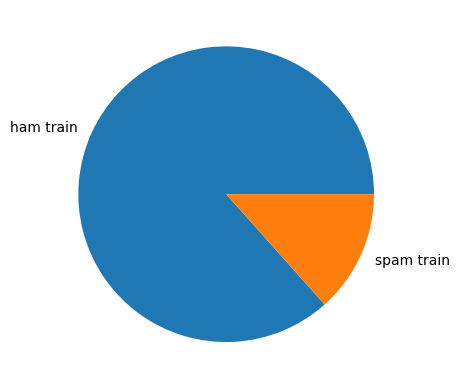

In [ ]:
labels = "ham train", "spam train"
sizes = [numOfHamTrain, numOfSpamTrain]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

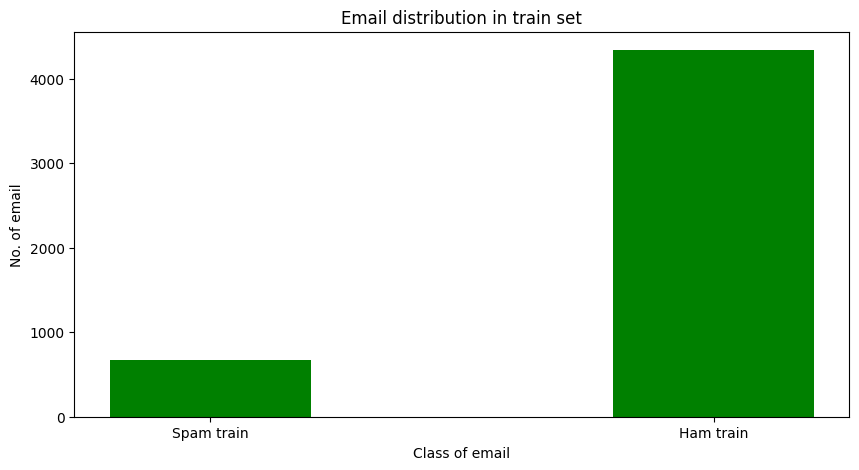

In [ ]:
values = [numOfSpamTrain, numOfHamTrain]
classes = ["Spam train", "Ham train"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='green',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in train set")
plt.show()

([<matplotlib.patches.Wedge at 0x7efe0c095780>,
 [Text(-1.0055717918571285, 0.44589838687894345, 'ham test'),
  Text(1.0055717918571283, -0.44589838687894406, 'spam test')])

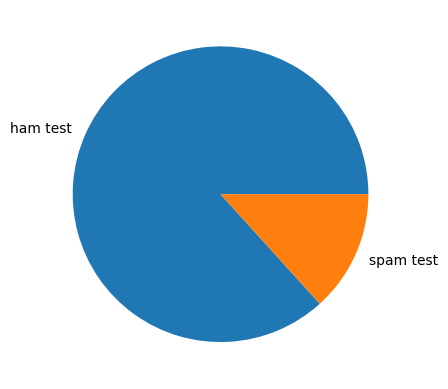

In [ ]:
labels = "ham test", "spam test"
sizes = [numOfHamTest, numOfSpamTest]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

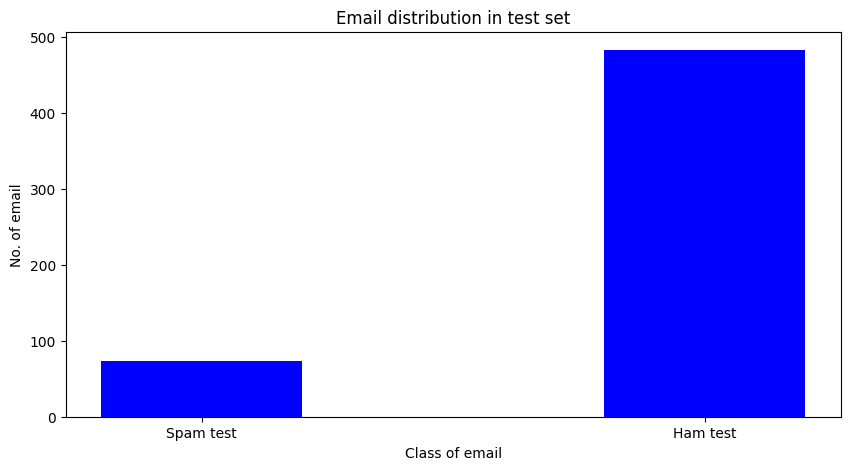

In [ ]:
values = [numOfSpamTest, numOfHamTest]
classes = ["Spam test", "Ham test"]

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, values, color ='blue',
        width = 0.4)

plt.xlabel("Class of email")
plt.ylabel("No. of email")
plt.title("Email distribution in test set")
plt.show()

# data preproccessing

In [ ]:
import string


for i in range(len(X_train)):
  X_train[i] = X_train[i].lower()
  X_train[i] = X_train[i].translate(str.maketrans('', '', string.punctuation))
  X_train[i] = X_train[i].translate(str.maketrans('', '', string.digits))

X_train[1]

'no problem we will be spending a lot of quality time together'

In [ ]:
for i in range(len(X_val)):
  X_val[i] = X_val[i].lower()
  X_val[i] = X_val[i].translate(str.maketrans('', '', string.punctuation))
  X_val[i] = X_val[i].translate(str.maketrans('', '', string.digits))

X_val[0]

'you have an important customer service announcement from premier call freephone    now'

In [ ]:
# we tought this package will be neccessary
#!pip install nltk

In [ ]:
type(X_train[0])

str

# lematization an stemming
we tried to lematize and stem data but it produces worse results with it than without it.

In [ ]:
#  preparing steps for stemming
"""
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
"""

"\nimport nltk\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import word_tokenize\nnltk.download('punkt')\nnltk.download('wordnet')\n"

In [ ]:
# lemmatization
"""
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))
"""

'\n# import these modules\nfrom nltk.stem import WordNetLemmatizer\n\nlemmatizer = WordNetLemmatizer()\n\nprint("rocks :", lemmatizer.lemmatize("rocks"))\nprint("corpora :", lemmatizer.lemmatize("corpora"))\n\n# a denotes adjective in "pos"\nprint("better :", lemmatizer.lemmatize("better", pos ="a"))\n'

In [ ]:
#stemming
"""
#word stemming
ps = PorterStemmer()

for i in range(len(X_train)):
  words = word_tokenize(X_train[i])

  for j in range(len(words)):
    words[j] = ps.stem(words[j])
    words[j] = lemmatizer.lemmatize(words[j])
  words = " ".join(words)
  X_train[i] = words


for i in range(len(X_val)):
  words = word_tokenize(X_val[i])
  for j in range(len(words)):
    words[j] = ps.stem(words[j])
    words[j] = lemmatizer.lemmatize(words[j])
  words = " ".join(words)
  X_train[i] = words

"""

'\n#word stemming\nps = PorterStemmer()\n\nfor i in range(len(X_train)):\n  words = word_tokenize(X_train[i])\n  \n  for j in range(len(words)):\n    words[j] = ps.stem(words[j])\n    words[j] = lemmatizer.lemmatize(words[j])\n  words = " ".join(words)\n  X_train[i] = words\n\n\nfor i in range(len(X_val)):\n  words = word_tokenize(X_val[i])\n  for j in range(len(words)):\n    words[j] = ps.stem(words[j])\n    words[j] = lemmatizer.lemmatize(words[j])\n  words = " ".join(words)\n  X_train[i] = words\n\n'

In [ ]:

X_train[0]

'hey i almost forgot  happy bday babe  i love ya'

In [ ]:
# importing vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)

In [ ]:
# trying to convert data series to list because of searching for all zeros but at the end no neccesary
"""
X_train = list(X_train)
type(X_train[0])
"""

'\nX_train = list(X_train)\ntype(X_train[0])\n'

In [ ]:
# fitting vector
fitted_vectorizer = vectorizer.fit(X_train)
vector = fitted_vectorizer.transform(X_train)
vector

<5014x8027 sparse matrix of type '<class 'numpy.float64'>'
	with 63458 stored elements in Compressed Sparse Row format>

In [ ]:
# as before trying to found why all elements of vector are zero but at the end not neccessary
"""
import scipy
vector = []
for i in range(len(X_train)):
  vector.append(vectorizer.transform([X_train[i]]))
vector = scipy.sparse.csr_matrix(vector)
vector.toarray()
"""

'\nimport scipy\nvector = []\nfor i in range(len(X_train)):\n  vector.append(vectorizer.transform([X_train[i]]))\nvector = scipy.sparse.csr_matrix(vector)\nvector.toarray()\n'

In [ ]:
# same as a cell above
"""
vector = []
for i in range(len(X_train)):
  vector.append(vectorizer.transform([X_train[i]]))
vector = np.array(vector)

for i in range(len(vector.toarray())):
  if vector.toarray()[0][i] != 0:
    print(vector.toarray()[0][i])

vector.toarray()
"""

'\nvector = []\nfor i in range(len(X_train)):\n  vector.append(vectorizer.transform([X_train[i]]))\nvector = np.array(vector)\n\nfor i in range(len(vector.toarray())):\n  if vector.toarray()[0][i] != 0:\n    print(vector.toarray()[0][i])\n\nvector.toarray()\n'

printing data to find error which at the end not existed we thought that all elements of vector are zero but in between end and beggining there were non zero numbers just were not shown because the vecgtor has 5000*8000 dimensions.

In [ ]:
vectorizer.get_feature_names_out().shape

(8027,)

In [ ]:
vector.toarray()[0][1]

0.0

In [ ]:
vector.toarray().shape

(5014, 8027)

In [ ]:
y_train.shape

(5014,)

In [ ]:
X_train.shape

(5014,)

In [ ]:
vector_val = vectorizer.transform(X_val)

In [ ]:
# importing algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# fitting and printing train set score of algorithm
gnb.fit(vector.toarray(),y_train)
gnb.score(vector.toarray(),y_train)

0.9471479856402074

In [ ]:
# printing test set score
gnb.score(vector_val.toarray(),y_val)

0.8781362007168458

In [ ]:
# predicring value of test set because of metrics
y_pred = gnb.predict(vector_val.toarray())

y_pred

In [ ]:
y_val

# metrics
calculating precision and recall as well as printing out a confusion matrix with y_predict and y_val

In [ ]:
from sklearn.metrics import precision_score
precision_spam = precision_score(y_val, y_pred, pos_label="spam")
precision_spam

0.5275590551181102

In [ ]:
precision_ham = precision_score(y_val, y_pred, pos_label="ham")
precision_ham

0.9814385150812065

In [ ]:
from sklearn.metrics import recall_score
recall_spam = recall_score(y_val, y_pred, pos_label="spam")
recall_spam

0.8933333333333333

In [ ]:
recall_ham = recall_score(y_val, y_pred, pos_label="ham")
recall_ham

0.8757763975155279

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

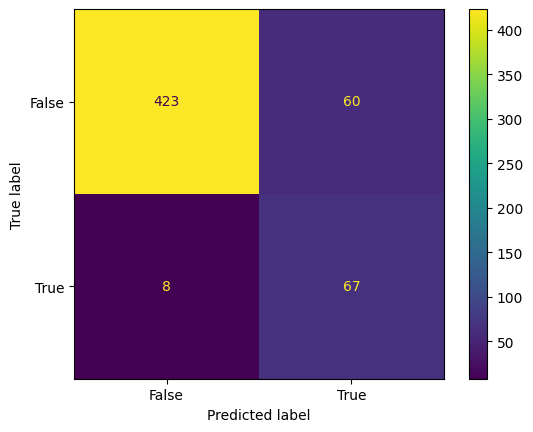

In [ ]:
cm_display.plot()
plt.show()